In [85]:
from datascience import *
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')

# THE DATASETS

In [62]:
gaza_daily_casualties = Table.read_table('casualties_daily_gaza_2025-04-12.csv')
gaza_daily_casualties

report_date,report_source,report_period,ext_massacres_cum,killed,killed_cum,ext_killed,ext_killed_cum,ext_killed_children_cum,ext_killed_women_cum,injured_cum,ext_injured,ext_injured_cum,ext_civdef_killed_cum,med_killed_cum,ext_med_killed_cum,press_killed_cum,ext_press_killed_cum
2023-10-07,mohtel,24,0,232,232,232,232,0,0,1610,1610,1610,0,6,6,1,1
2023-10-08,mohtel,24,0,138,370,138,370,78,41,1788,178,1788,0,nan,6,1,1
2023-10-09,mohtel,24,8,190,560,190,560,91,61,2271,483,2271,0,6,6,3,3
2023-10-10,mohtel,24,8,340,900,340,900,260,230,4000,1729,4000,0,nan,6,7,7
2023-10-11,gmotel,24,23,200,1100,200,1100,398,230,5184,1184,5184,0,10,10,nan,7
2023-10-12,mohtel,24,23,317,1417,317,1417,500,276,5763,579,5763,0,11,11,nan,7
2023-10-13,missing,24,23,483,1900,483,1900,500,392,nan,1475,7238,0,11,11,nan,7
2023-10-14,gmotel,24,23,328,2228,328,2228,600,600,8714,1476,8714,0,11,11,nan,7
2023-10-15,gmotel,24,23,442,2670,442,2670,700,735,9200,486,9200,0,nan,11,nan,7
2023-10-16,gmotel,24,371,138,2808,138,2808,853,936,10850,1650,10850,7,37,37,nan,7


In [63]:
west_bank_daily_casualties = Table.read_table('casualties_daily_west_bank_2025-04-12.csv')
west_bank_daily_casualties

report_date,verified.killed,verified.killed_cum,verified.injured,verified.injured_cum,verified.killed_children,verified.killed_children_cum,verified.injured_children,verified.injured_children_cum,killed_cum,killed_children_cum,injured_cum,injured_children_cum,settler_attacks_cum,flash_source
2023-10-07,6,6,197,197,2,2,31,31,3,0,23,1,3,un
2023-10-08,8,14,127,324,3,5,7,38,13,1,194,1,9,un
2023-10-09,4,18,88,412,0,5,19,57,15,3,295,34,19,un
2023-10-10,5,23,72,484,0,5,7,64,19,3,332,39,29,un
2023-10-11,6,29,85,569,2,7,17,81,26,3,427,62,39,un
2023-10-12,7,36,49,618,0,7,11,92,33,5,500,81,49,un
2023-10-13,17,53,613,1231,6,13,27,119,43,8,700,92,63,un
2023-10-14,3,56,13,1244,2,15,1,120,54,13,1150,106,67,un
2023-10-15,2,58,18,1262,1,16,2,122,61,15,1173,113,70,un
2023-10-16,2,60,23,1285,0,16,0,122,61,15,1176,113,70,un


In [64]:
killed_in_gaza = Table.read_table('killed-in-gaza.csv').relabeled(2,'Arabic name')
killed_in_gaza

Index,Name,Arabic name,Born,Age,Sex,ID number
1,Mohammed Hani Mohammed Al-Zahhar,محمد هاني محمد الزهار,8/9/2023,0,m,444196471
2,Nour Mohammed Aed Udwan,نور محمد عائد عدوان,2/27/2023,0,f,444484729
3,Khaled Mumin Amin Shabir,خالد مؤمن ام6 شبير,4/16/2023,0,m,444799647
4,Yamen Ibrahim Farid Qaddoura,يامن ابراهيم فريد قدوره,6/10/2023,0,m,445958408
5,Ahmed Rami Ahmed Abdel Qadir,أحمد رامي أحمد عبد القادر,12/22/2022,0,m,445808546
6,Houriya Ahmed Imran Ghaben,حورية أحمد عمران غD,4/10/2023,0,f,445639958
7,Zain Mohammed Khaled Al-Houbi,زين محمد خالد الهوبي,5/23/2023,0,m,444489579
8,Rakan Mumin Mousa Rabie,ركان مؤمن موسي ربيع,9/29/2023,0,m,444466494
9,Taysir Mohammed Taysir Al-Hassi,تيسير محمد تيسير الهسي,2/19/2023,0,m,444496053
10,Kenan Akram Samih Karim,كنان اكرم سميح كريم,8/5/2023,0,m,445362098


In [65]:
infrastructure_damaged = Table.read_table('infrastructure-damaged.csv')
infrastructure_damaged

report_date,civic_buildings__destroyed,civic_buildings__ext_destroyed,educational_buildings__destroyed,educational_buildings__ext_destroyed,educational_buildings__damaged,educational_buildings__ext_damaged,places_of_worship__mosques_destroyed,places_of_worship__ext_mosques_destroyed,places_of_worship__mosques_damaged,places_of_worship__ext_mosques_damaged,places_of_worship__churches_destroyed,places_of_worship__ext_churches_destroyed,residential__destroyed,residential__ext_destroyed
2023-10-07,nan,5,nan,1,nan,15,nan,2,nan,4,nan,0,nan,80
2023-10-08,nan,11,nan,1,nan,30,nan,4,nan,8,nan,0,159,159
2023-10-09,nan,16,nan,2,nan,45,nan,6,nan,12,nan,0,790,790
2023-10-10,nan,22,nan,2,nan,60,nan,8,nan,17,nan,0,1009,1009
2023-10-11,27,27,3,3,75,75,10,10,nan,21,nan,0,2835,2835
2023-10-12,nan,29,3,3,75,75,10,10,nan,25,nan,0,nan,4188
2023-10-13,nan,31,nan,9,nan,100,nan,12,nan,29,nan,0,5540,5540
2023-10-14,nan,33,14,14,124,124,nan,14,nan,33,nan,0,7000,7000
2023-10-15,nan,35,14,14,143,143,nan,16,nan,37,nan,0,8840,8840
2023-10-16,nan,37,18,18,150,150,nan,18,nan,41,nan,1,10500,10500


### Checking Missing Values
Before proceeding with data analysis, we need to identify missing values in each dataset to understand what needs to be handled.


In [66]:
# Check for missing values
def count_missing_columns(table):
    missing_counts = {}
    for column in table.labels:
        count = sum(1 for value in table.column(column) if value is None or value == "" or str(value).lower().strip() in ["missing", "nan", " "])
        if count > 0:  # Only print if there are missing values
            missing_counts[column] = count
    return missing_counts

print("Columns with missing values in each dataset:")
print("-" * 40)
print(f"Daily Casualties - Gaza (with total records of {gaza_daily_casualties.num_rows}):", count_missing_columns(gaza_daily_casualties))
print("-" * 40)
print(f"Daily Casualties - West Bank (with total records of {west_bank_daiy_casualties.num_rows}):", count_missing_columns(west_bank_daiy_casualties))
print("-" * 40)
print(f"Killed in Gaza (with total records of {killed_in_gaza.num_rows}):", count_missing_columns(killed_in_gaza))
print("-" * 40)
print(f"Infrastructure Damaged (with total records of {infrastructure_damaged.num_rows}):", count_missing_columns(infrastructure_damaged))
print("-" * 40)

Columns with missing values in each dataset:
----------------------------------------
Daily Casualties - Gaza (with total records of 551): {'report_source': 12, 'killed': 27, 'killed_cum': 7, 'injured_cum': 15, 'med_killed_cum': 417, 'press_killed_cum': 409}
----------------------------------------
Daily Casualties - West Bank (with total records of 551): {'verified.killed': 148, 'verified.killed_cum': 147, 'verified.injured': 162, 'verified.injured_cum': 160, 'verified.killed_children': 148, 'verified.killed_children_cum': 147, 'verified.injured_children': 162, 'verified.injured_children_cum': 160}
----------------------------------------
Killed in Gaza (with total records of 50020): {}
----------------------------------------
Infrastructure Damaged (with total records of 534): {'civic_buildings__destroyed': 451, 'educational_buildings__destroyed': 445, 'educational_buildings__damaged': 444, 'places_of_worship__mosques_destroyed': 453, 'places_of_worship__mosques_damaged': 464, 'place

In [67]:
#dealing with the missing data

# Remove unwanted columns from the "Daily Casualties - Gaza" table
columns_to_remove = ["killed", "killed_cum", "injured_cum", "med_killed_cum", "press_killed_cum"]
processed_gaza_daily_casualties = gaza_daily_casualties.drop(*columns_to_remove)

# Save the updated CSV
processed_gaza_daily_casualties.to_csv("casualties_daily_gaza_cleaned.csv")
print(f"Daily Casualties - Gaza (with total records of {processed_gaza_daily_casualties.num_rows}):", count_missing_columns(processed_gaza_daily_casualties))

Daily Casualties - Gaza (with total records of 551): {'report_source': 12}


In [113]:
def extrapolate_missing_values(table, cum_column, daily_column):
    cum_values = list(table.column(cum_column))  # Convert cumulative column to list
    daily_values = list(table.column(daily_column))  # Convert daily column to list

    print(f"\n🔍 Debugging {cum_column} and {daily_column}...\n")  # Log start

    for i in range(len(cum_values)):
        # Log the original row values
        print(f"Row {i}: {cum_column}={cum_values[i]}, {daily_column}={daily_values[i]}")

        # Detect NaN values and convert them to None
        if isinstance(cum_values[i], float) and str(cum_values[i]).lower().strip() in ["nan", ""]:
            cum_values[i] = None
        if isinstance(daily_values[i], float) and str(daily_values[i]).lower().strip() in ["nan", ""]:
            daily_values[i] = None

        # Debug missing values detection
        if cum_values[i] is None or daily_values[i] is None:
            print(f"⛔ Missing detected at Row {i}: {cum_column}={cum_values[i]}, {daily_column}={daily_values[i]}")

    # ✅ Enhanced block: Handle multiple consecutive rows with both missing
    i = 0
    while i < len(cum_values):
        if cum_values[i] is None and daily_values[i] is None:
            # Start of a missing block
            start_idx = i
            while i < len(cum_values) and cum_values[i] is None and daily_values[i] is None:
                i += 1
            end_idx = i - 1

            prev_cum = cum_values[start_idx - 1] if start_idx > 0 else None
            next_cum = None
            for j in range(i, len(cum_values)):
                if cum_values[j] is not None:
                    next_cum = cum_values[j]
                    next_idx = j
                    break

            if prev_cum is not None and next_cum is not None:
                days_gap = next_idx - (start_idx - 1)
                avg_daily = max((next_cum - prev_cum) / days_gap, 0)
                for k in range(start_idx, end_idx + 1):
                    cum_values[k] = prev_cum + avg_daily * (k - (start_idx - 1))
                    daily_values[k] = avg_daily
                    print(f"✅ Interpolated both at Row {k}: {cum_column}={cum_values[k]}, {daily_column}={daily_values[k]}")
            elif prev_cum is not None:
                # Fill using assumed small increment (e.g., 1%)
                for k in range(start_idx, end_idx + 1):
                    daily_values[k] = max(prev_cum * 0.01, 0)
                    cum_values[k] = cum_values[k - 1] + daily_values[k] if k > 0 else prev_cum + daily_values[k]
                    print(f"⚠️ Estimating both at Row {k}: {cum_column}={cum_values[k]}, {daily_column}={daily_values[k]}")
            # If no previous cumulative exists, do nothing (leave None)
        else:
            i += 1

    # 🔁 Re-run single-point logic after bulk interpolation
    for i in range(len(cum_values)):
        # **Fill missing cumulative using daily increment or last known value**
        if cum_values[i] is None:
            if i > 0 and daily_values[i] is not None:
                cum_values[i] = max(cum_values[i - 1] + daily_values[i], cum_values[i - 1])
                print(f"✅ Fixed {cum_column} at Row {i}: New Value={cum_values[i]}")
            elif i > 0:
                cum_values[i] = cum_values[i - 1]
                print(f"⚠️ Using last known {cum_column} at Row {i}: Value={cum_values[i]}")

        # **Fill missing daily using cumulative difference or assumption**
        if daily_values[i] is None:
            prev_cum = cum_values[i - 1] if i > 0 else None
            next_cum = cum_values[i + 1] if i < len(cum_values) - 1 else None

            if prev_cum is not None and next_cum is not None:
                daily_values[i] = max(next_cum - prev_cum, 0)
                print(f"✅ Fixed {daily_column} at Row {i}: New Value={daily_values[i]}")
            elif prev_cum is not None:
                daily_values[i] = max(prev_cum * 0.01, 0)
                print(f"⚠️ Using estimated {daily_column} at Row {i}: Value={daily_values[i]}")

    # Create a new table with the updated values
    new_table = table.with_columns(
        cum_column, cum_values,
        daily_column, daily_values
    )

    print(f"\n🎯 Finished processing {cum_column} and {daily_column}\n")
    return new_table


In [114]:
daily_casualties_wb = extrapolate_missing_values(west_bank_daily_casualties, "verified.killed_cum", "verified.killed")
print(f"Daily Casualties - West Bank (with total records of {daily_casualties_wb.num_rows}):", count_missing_columns(daily_casualties_wb))


🔍 Debugging verified.killed_cum and verified.killed...

Row 0: verified.killed_cum=6.0, verified.killed=6.0
Row 1: verified.killed_cum=14.0, verified.killed=8.0
Row 2: verified.killed_cum=18.0, verified.killed=4.0
Row 3: verified.killed_cum=23.0, verified.killed=5.0
Row 4: verified.killed_cum=29.0, verified.killed=6.0
Row 5: verified.killed_cum=36.0, verified.killed=7.0
Row 6: verified.killed_cum=53.0, verified.killed=17.0
Row 7: verified.killed_cum=56.0, verified.killed=3.0
Row 8: verified.killed_cum=58.0, verified.killed=2.0
Row 9: verified.killed_cum=60.0, verified.killed=2.0
Row 10: verified.killed_cum=63.0, verified.killed=3.0
Row 11: verified.killed_cum=67.0, verified.killed=4.0
Row 12: verified.killed_cum=82.0, verified.killed=15.0
Row 13: verified.killed_cum=84.0, verified.killed=2.0
Row 14: verified.killed_cum=86.0, verified.killed=2.0
Row 15: verified.killed_cum=94.0, verified.killed=8.0
Row 16: verified.killed_cum=96.0, verified.killed=2.0
Row 17: verified.killed_cum=97.0, 

# Plot 1

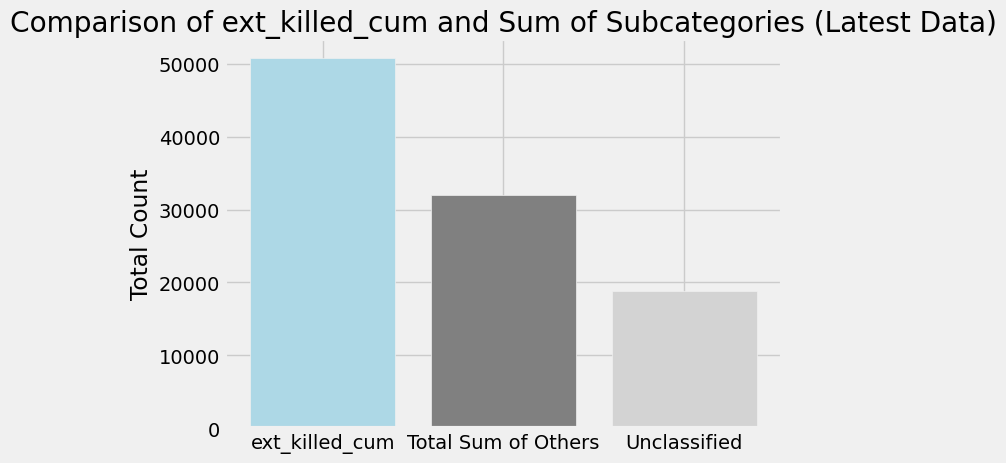

In [28]:
gaza_daiy_casualties_sorted = gaza_daiy_casualties.sort("report_date", descending=True)

ext_columns = gaza_daiy_casualties_sorted.select(
    "report_date", 
    "ext_killed_cum", 
    "ext_killed_children_cum", 
    "ext_killed_women_cum", 
    "ext_civdef_killed_cum", 
    "ext_med_killed_cum", 
    "ext_press_killed_cum"
)


latest_report = ext_columns.take(1)


total_sum = 0


columns_to_sum = [
    "ext_killed_children_cum", 
    "ext_killed_women_cum", 
    "ext_civdef_killed_cum", 
    "ext_med_killed_cum", 
    "ext_press_killed_cum"
]


for col in columns_to_sum:
    value = latest_report.column(col).item(0)
    if value is not None and value != '':
        total_sum += value

ext_killed_cum = latest_report.column("ext_killed_cum").item(0)


unclassified = ext_killed_cum - total_sum
categories = ['ext_killed_cum', 'Total Sum of Others', 'Unclassified']
values = [ext_killed_cum, total_sum, unclassified]

plt.bar(categories, values, color=['lightblue', 'grey', 'lightgray'])
plt.ylabel('Total Count')
plt.title('Comparison of ext_killed_cum and Sum of Subcategories (Latest Data)')
plt.show()
